# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
print("Head:")
display(df.head())

Head:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance    

In [5]:
print("Describe:")
display(df.describe())

Describe:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

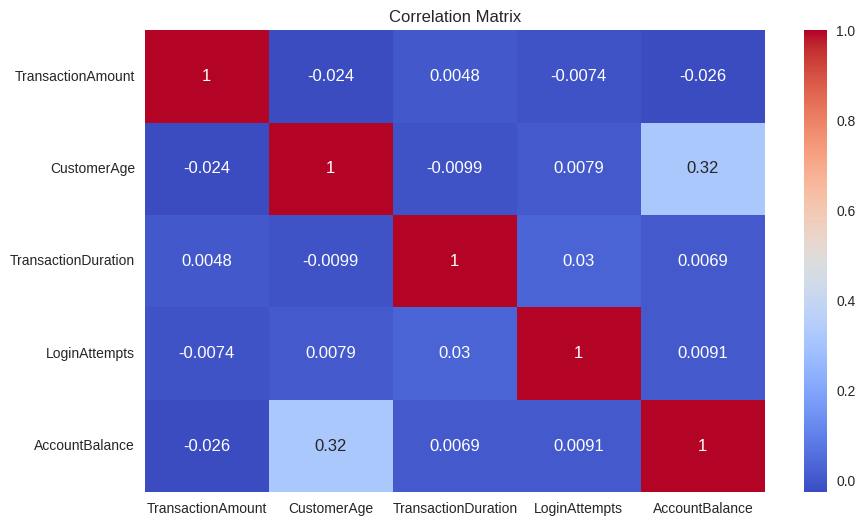

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

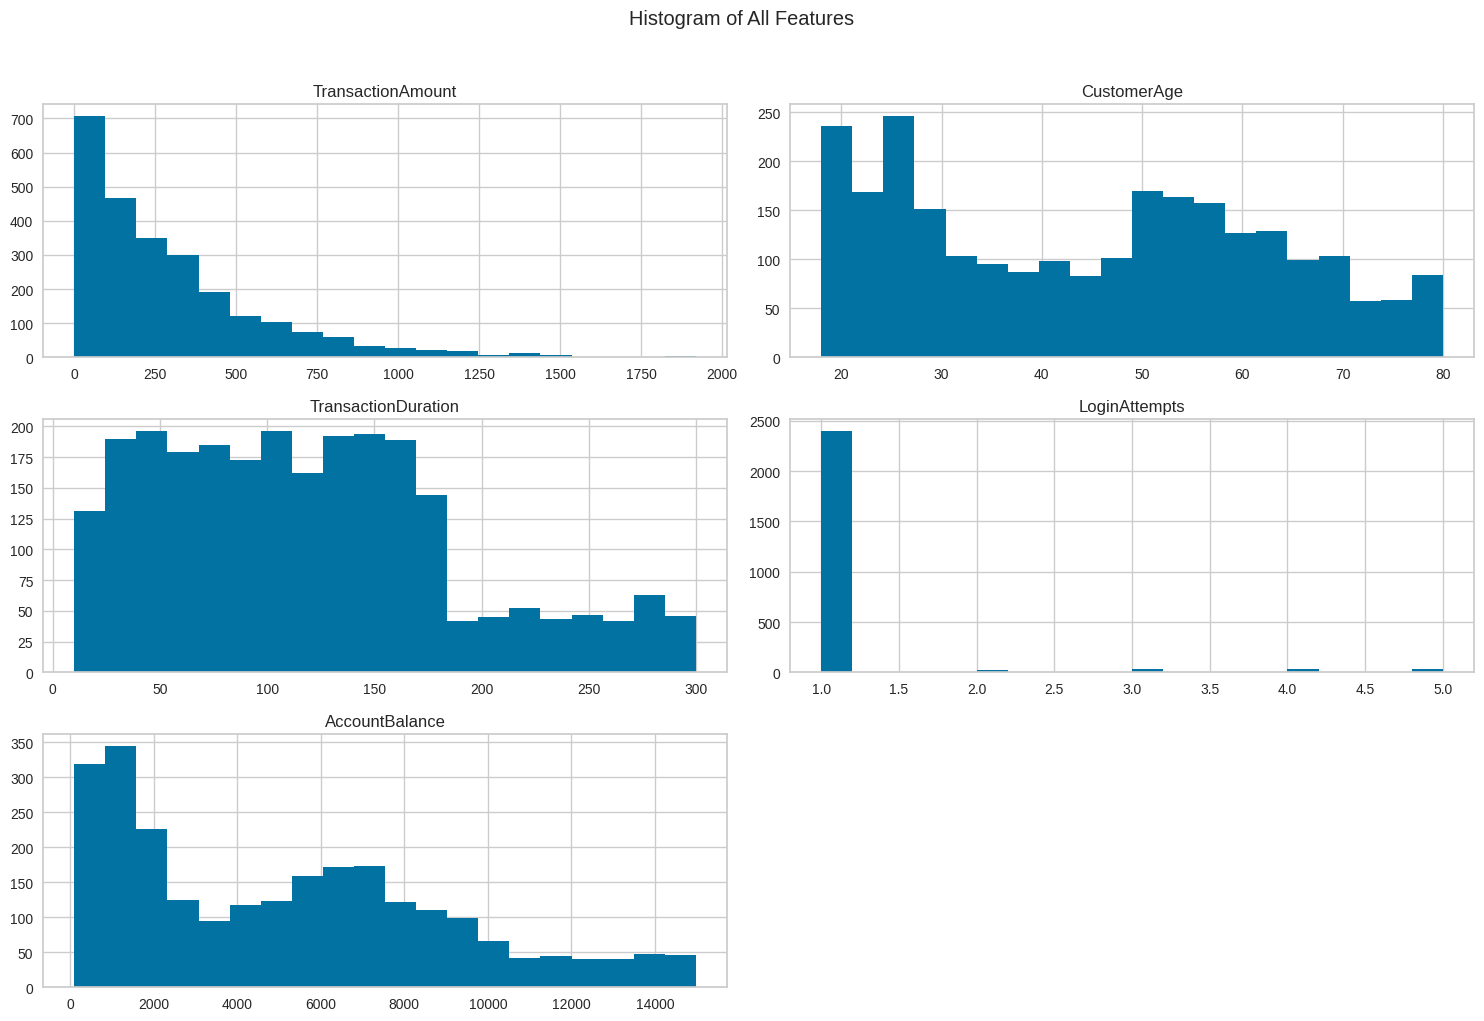

In [8]:
df.hist(figsize=(15,10), bins=20)
plt.suptitle("Histogram of All Features", y=1.02)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
print("=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())

=== Jumlah Missing Values per Kolom ===
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
print("=== Jumlah Duplikasi Data ===")
print(df.duplicated().sum())


=== Jumlah Duplikasi Data ===
21


In [14]:
# Menyalin dataframe untuk menjaga data asli tetap utuh
df_scaled = df.copy()

# Daftar kolom numerik yang akan discaling
numerical_columns = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Menampilkan hasil scaling
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.435484,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [15]:
# Drop kolom yang berisi id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])

# Cek kolom yang tersisa
print(df.columns)

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [16]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Daftar kolom kategorikal yang akan di-encode
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Melakukan encoding pada setiap kolom kategorikal
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount      TransactionDate  TransactionType  Location  Channel  \
0              14.09  2023-04-11 16:29:14                1        36        0   
1             376.24  2023-06-27 16:44:19                1        15        0   
2             126.29  2023-07-10 18:16:08                1        23        2   
3             184.50  2023-05-05 16:32:11                1        33        2   
4              13.45  2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4         45.0                   3                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     20

In [17]:
# Konversi kolom ke tipe datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstrak fitur tanggal dari TransactionDate
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionWeekday'] = df['TransactionDate'].dt.weekday  # Senin=0, Minggu=6

# Hitung selisih hari antara TransactionDate dan PreviousTransactionDate
df['DaysSincePrevious'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

# Kalau mau, kolom tanggal asli bisa di-drop
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

# Cek hasilnya
print(df.head())

   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              13.45                0         1        2         45.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                 81.0            1.0         5112.21   
1                   0                141.0            1.0        13758.91   
2                   3                 56.0            1.0         1122.35   
3                   3                 25.0            1.0         8569.06   
4                   3                198.0            1.0         7429.40   

   TransactionYear  TransactionMonth  TransactionDay  TransactionHour  \
0             2023       

In [18]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionYear',
 'TransactionMonth',
 'TransactionDay',
 'TransactionHour',
 'TransactionWeekday',
 'DaysSincePrevious']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [12]:
for col in ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

for col in ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

print(df.isnull().sum())


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [13]:
# Menghapus duplikat
df = df.drop_duplicates()
print("Jumlah duplikat setelah dihapus:", df.duplicated().sum())

Jumlah duplikat setelah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionWeekday,DaysSincePrevious
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,296.962429,0.776143,20.928827,0.989264,44.634990,1.521272,119.485089,1.121670,5113.473380,2023.005169,6.497813,15.645726,16.619881,1.436978,-489.999205
std,291.097227,0.416910,12.195117,0.804401,17.747219,1.134477,69.634299,0.594582,3877.541577,0.071724,3.508980,8.819532,0.730788,1.512183,107.668519
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.000000,101.250000,2023.000000,1.000000,1.000000,16.000000,0.000000,-672.000000
25%,83.200000,1.000000,11.000000,0.000000,27.000000,0.500000,63.000000,1.000000,1519.365000,2023.000000,3.000000,8.000000,16.000000,0.000000,-586.000000
50%,211.360000,1.000000,21.000000,1.000000,45.000000,2.000000,112.000000,1.000000,4734.110000,2023.000000,7.000000,16.000000,16.000000,1.000000,-488.000000
75%,409.600000,1.000000,31.000000,2.000000,59.000000,3.000000,161.000000,1.000000,7641.410000,2023.000000,10.000000,23.000000,17.000000,3.000000,-396.000000
max,1919.110000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,5.000000,14977.990000,2024.000000,12.000000,31.000000,18.000000,4.000000,-308.000000


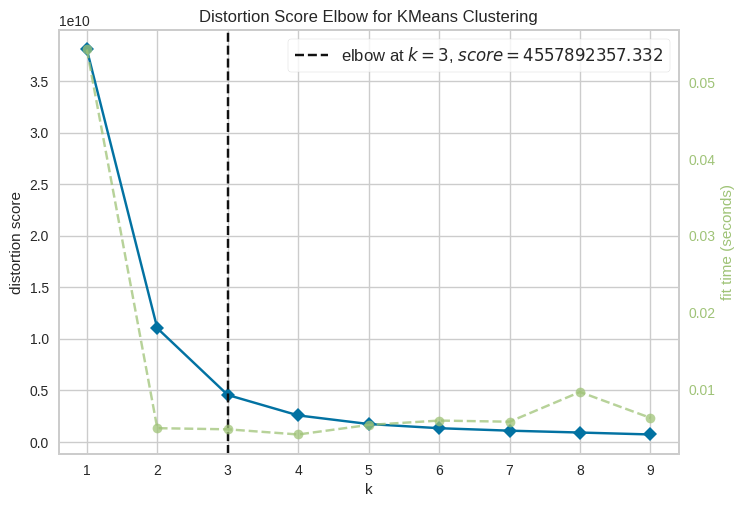

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
X = df.values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [22]:
# Menggunakan data array dari df.values
X = df.values

# Membuat model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Menampilkan cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Menampilkan label cluster tiap data
print("Cluster Labels:")
print(kmeans.labels_)

# Menambahkan hasil cluster ke dataframe asli sebagai kolom baru
df['Cluster'] = kmeans.labels_

# Menampilkan 5 data teratas dengan cluster nya
print(df.head())

Cluster Centers:
[[ 2.79552745e+02  7.81837161e-01  2.02505219e+01  1.01043841e+00
   5.16315240e+01  1.27661795e+00  1.18355950e+02  1.11691023e+00
   6.40888239e+03  2.02300939e+03  6.53966597e+00  1.56409186e+01
   1.66534447e+01  1.42797495e+00 -4.87183716e+02]
 [ 3.09016418e+02  7.76888889e-01  2.12853333e+01  9.73333333e-01
   3.76604444e+01  2.20622222e+00  1.19258667e+02  1.11822222e+00
   1.55587428e+03  2.02300267e+03  6.45688889e+00  1.56986667e+01
   1.66062222e+01  1.44355556e+00 -4.92115556e+02]
 [ 3.04179421e+02  7.61574074e-01  2.15046296e+01  9.83796296e-01
   4.72824074e+01  2.80092593e-01  1.22578704e+02  1.14120370e+00
   1.15053650e+04  2.02300231e+03  6.51157407e+00  1.55185185e+01
   1.65810185e+01  1.43981481e+00 -4.90731481e+02]]
Cluster Labels:
[0 2 1 ... 0 0 1]
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        

Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.6163409013473318


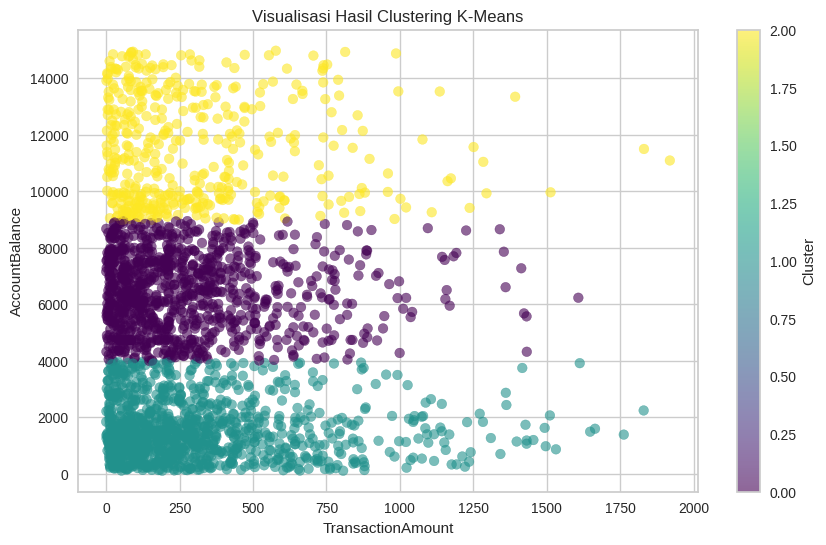

In [26]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['TransactionAmount'], df['AccountBalance'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.title('Visualisasi Hasil Clustering K-Means')
plt.colorbar(scatter, label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

           PC1         PC2
0    -0.717210 -283.489085
1  8645.280796   96.550883
2 -3990.805635 -178.635258
3  3455.725965 -105.981192
4  2316.565693 -278.086969


In [30]:
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [36]:
numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge']
desc_cluster = df.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max', 'std', 'median', 'count'])
print(desc_cluster)

        TransactionAmount                                           \
                     mean   min      max         std  median count   
Cluster                                                              
0              279.552745  0.32  1607.55  262.769784  211.36   958   
1              309.016418  0.26  1830.00  308.261938  213.76  1125   
2              304.179421  1.14  1919.11  303.370529  200.52   432   

        AccountBalance                                                   \
                  mean      min       max          std     median count   
Cluster                                                                   
0          6408.882390  3984.38   8942.58  1325.735261   6394.600   958   
1          1555.874276   101.25   3966.54  1006.033113   1375.800  1125   
2         11505.364954  8974.93  14977.99  1855.025372  11234.255   432   

        CustomerAge                                      
               mean   min   max        std median count  
Cluster     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Senior dengan Saldo dan Transaksi Sedang)**
- **Rata-rata (mean) Transaction Amount:** 279.55  
- **Rata-rata (mean) Account Balance:** 6,408.88  
- **Rata-rata (mean) Customer Age:** 51.63  
- **Analisis:** Cluster ini merupakan nasabah berusia lebih tua dengan saldo akun dan nilai transaksi yang berada di level sedang. Kelompok ini cenderung stabil secara finansial dengan dana yang cukup, namun tidak terlalu agresif dalam melakukan transaksi. Rekomendasi untuk cluster ini adalah menawarkan produk tabungan atau investasi jangka panjang yang memberikan keamanan dan bunga kompetitif.

2. **Cluster 1: (Nasabah Muda Aktif dengan Saldo Rendah)**
- **Rata-rata (mean) Transaction Amount:** 309.02  
- **Rata-rata (mean) Account Balance:** 1,555.87  
- **Rata-rata (mean) Customer Age:** 37.66  
- **Analisis:** Cluster ini terdiri dari nasabah yang lebih muda dengan saldo rendah namun melakukan transaksi dalam jumlah relatif tinggi. Kelompok ini cenderung aktif menggunakan layanan perbankan meskipun dana yang dimiliki terbatas. Rekomendasi yang cocok untuk cluster ini adalah produk kredit mikro, layanan digital banking, atau promosi transaksi tanpa biaya.

3. **Cluster 2: (Nasabah Dewasa dengan Saldo dan Transaksi Tinggi)**
- **Rata-rata (mean) Transaction Amount:** 304.18  
- **Rata-rata (mean) Account Balance:** 11,505.36  
- **Rata-rata (mean) Customer Age:** 47.28  
- **Analisis:** Cluster ini berisi nasabah dengan saldo sangat besar dan nilai transaksi yang tinggi, serta usia dewasa matang. Kelompok ini memiliki daya beli tinggi dan cenderung menjadi pelanggan premium. Rekomendasi untuk cluster ini adalah menawarkan produk investasi eksklusif, layanan wealth management, dan paket premium perbankan.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [39]:
df['Target'] = kmeans.labels_

In [40]:
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)